In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
epsilon_greedy_015 = pd.read_csv("Data/epsilon_greedy_0.15_2_epochs.csv", index_col="Unnamed: 0")
moss = pd.read_csv("Data/moss_2_epochs.csv.", index_col="Unnamed: 0")
moss_anytime_135 = pd.read_csv("Data/moss_anytime_1.35_2_epochs.csv.", index_col="Unnamed: 0")
exp3_07 = pd.read_csv("Data/exp3_0.7_4_epochs.csv", index_col="Unnamed: 0")
exp3_07_tuned = pd.read_csv("Data/exp3_tuned_0.7_0.05_4_epochs.csv", index_col="Unnamed: 0")

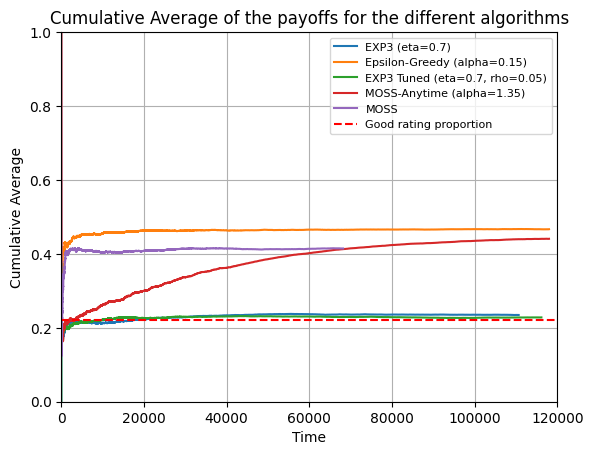

In [9]:
cumulative_average_epsilon = np.cumsum(epsilon_greedy_015['0']) / np.arange(1, len(epsilon_greedy_015['0'])+1)
cumulative_average_moss = np.cumsum(moss['0']) / np.arange(1, len(moss['0'])+1)
cumulative_average_moss_anytime = np.cumsum(moss_anytime_135['0']) / np.arange(1, len(moss_anytime_135['0'])+1)
cumulative_average_exp3 = np.cumsum(exp3_07['0']) / np.arange(1, len(exp3_07['0'])+1)
cumulative_average_exp3_tuned = np.cumsum(exp3_07_tuned['0']) / np.arange(1, len(exp3_07_tuned['0'])+1)

plt.plot(cumulative_average_exp3, label = 'EXP3 (eta=0.7)')
plt.plot(cumulative_average_epsilon[:118000], label = 'Epsilon-Greedy (alpha=0.15)')
plt.plot(cumulative_average_exp3_tuned, label = 'EXP3 Tuned (eta=0.7, rho=0.05)')
plt.plot(cumulative_average_moss_anytime[:118000], label = 'MOSS-Anytime (alpha=1.35)')
plt.plot(cumulative_average_moss, label = 'MOSS')
plt.axhline(y=0.22, color='r', linestyle='--', label='Good rating proportion')
plt.legend(fontsize = 8)
plt.xlabel("Time")
plt.ylabel("Cumulative Average")
plt.title("Cumulative Average of the payoffs for the different algorithms")
plt.ylim(0, 1)
plt.xlim(0, 120000)
plt.grid(True)
plt.savefig('Images/comparative plot.png')
plt.show()

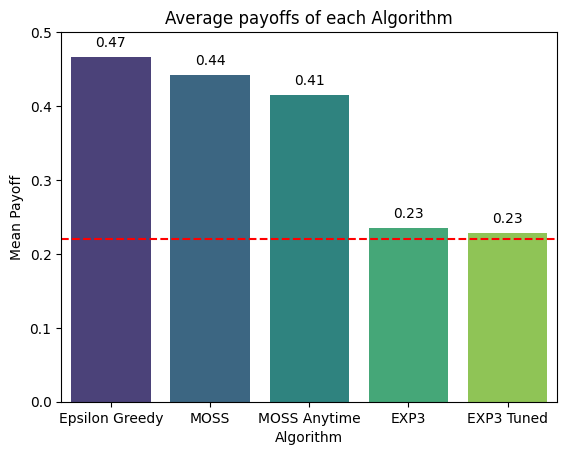

In [7]:
mean_epsilon = sum(epsilon_greedy_015["0"])/len(epsilon_greedy_015)
mean_moss = sum(moss_anytime_135["0"])/len(moss_anytime_135)
mean_moss_a = sum(moss["0"])/len(moss)
mean_exp3 = sum(exp3_07["0"])/len(exp3_07)
mean_exp3_tuned = sum(exp3_07_tuned["0"])/len(exp3_07_tuned)

algorithms = ['Epsilon Greedy', 'MOSS', 'MOSS Anytime', 'EXP3', "EXP3 Tuned"]
means = [mean_epsilon, mean_moss, mean_moss_a, mean_exp3, mean_exp3_tuned]

# Create a bar plot
ax = sns.barplot(x=algorithms, y=means, palette="viridis", hue=algorithms, dodge=False)

# Add annotations on top of each bar
for i, value in enumerate(means):
    ax.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Customize labels and title
plt.xlabel('Algorithm')
plt.ylabel('Mean Payoff')
plt.title('Average payoffs of each Algorithm')

# Set y-axis limit
plt.ylim(0, 0.5)

# Add a horizontal line
plt.axhline(y=0.22, color='r', linestyle='--', label='Good rating proportion')

# Save the plot
plt.savefig('Images/comparative_plot_bars.png')

# Show the plot
plt.show()